In [1]:
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
data_path = '../input/Teste4/'
geo_model = gp.create_model('SyntheitcBasinTeste4')

In [3]:
gp.init_data(geo_model,
             extent=[85000, 89000, 27000, 33000, -20000, 0],
             resolution=[50, 50, 50],
             path_i=data_path + "surface_points.csv",
             path_o=data_path + "orientations_points.csv")

Active grids: ['regular']


SyntheitcBasinTeste4  2023-03-01 16:11

In [4]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,camada0,Default series,1,#015482,1
1,camada1,Default series,2,#9f0052,2
2,camada2,Default series,3,#ffbe00,3
3,camada3,Default series,4,#728f02,4
4,fault1,Default series,5,#443988,5
5,fault2,Default series,6,#ff3f20,6
6,basement,Basement,1,#5DA629,7


In [5]:
gp.get_data(geo_model, 'surface_points').head()

,X,Y,Z,smooth,surface
0,2500,2500,0,0.000002,camada0
1,2500,3500,0,0.000002,camada0
2,3500,2500,0,0.000002,camada0
3,3500,3500,0,0.000002,camada0
4,2750,2750,100,0.000002,camada1


In [6]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,camada0,Default series,1,#015482,1
1,camada1,Default series,2,#9f0052,2
2,camada2,Default series,3,#ffbe00,3
3,camada3,Default series,4,#728f02,4
4,fault1,Default series,5,#443988,5
5,fault2,Default series,6,#ff3f20,6
6,basement,Basement,1,#5DA629,7


In [7]:
gp.map_stack_to_surfaces(geo_model, {"Fault_Series": ('fault1', 'fault2'),
                                     "Strat_Series": ('camada0','camada1', 'camada2', 'camada3')})

,surface,series,order_surfaces,color,id
4,fault1,Fault_Series,1,#443988,1
5,fault2,Fault_Series,2,#ff3f20,2
0,camada0,Strat_Series,1,#015482,3
1,camada1,Strat_Series,2,#9f0052,4
2,camada2,Strat_Series,3,#ffbe00,5
3,camada3,Strat_Series,4,#728f02,6
6,basement,Basement,1,#5DA629,7


In [8]:
geo_model.stack

,order_series,BottomRelation,isActive,isFault,isFinite
Fault_Series,1,Erosion,False,False,False
Strat_Series,2,Erosion,True,False,False
Basement,3,Erosion,False,False,False


In [9]:
geo_model.grid

Grid Object. Values: 
array([[  40.,   40.,    5.],
       [  40.,   40.,   15.],
       [  40.,   40.,   25.],
       ...,
       [3960., 3960.,  475.],
       [3960., 3960.,  485.],
       [3960., 3960.,  495.]])

In [10]:
gp.get_data(geo_model, 'surface_points').head()

,X,Y,Z,smooth,surface
0,2500,2500,0,0.000002,camada0
1,2500,3500,0,0.000002,camada0
2,3500,2500,0,0.000002,camada0
3,3500,3500,0,0.000002,camada0
4,2750,2750,100,0.000002,camada1


In [11]:
gp.get_data(geo_model, 'orientations')

,X,Y,Z,G_x,G_y,G_z,smooth,surface
8,3250,3000,100,-4.330127e-01,-0.750000,-5.000000e-01,0.01,fault1
9,2750,3000,100,4.330127e-01,0.750000,5.000000e-01,0.01,fault1
10,2800,2900,200,-8.528685e-01,-0.150384,-5.000000e-01,0.01,fault2
11,3200,3100,150,8.528685e-01,0.150384,5.000000e-01,0.01,fault2
0,2500,2500,0,1.000000e-12,1.000000,1.000061e-12,0.01,camada0
1,2500,3500,0,1.000000e-12,1.000000,1.000061e-12,0.01,camada0
2,3500,2500,0,1.000000e-12,1.000000,1.000061e-12,0.01,camada0
3,3500,3500,0,1.000000e-12,1.000000,1.000061e-12,0.01,camada0
4,2750,2750,100,1.631759e-01,0.925417,3.420201e-01,0.01,camada1
7,3500,3500,300,6.123724e-01,0.612372,5.000000e-01,0.01,camada1


C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


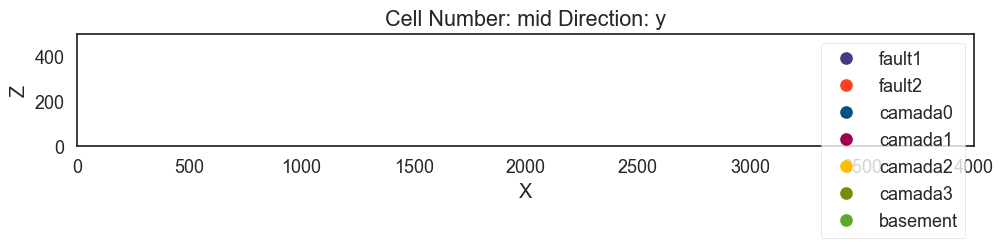

In [12]:
plot = gp.plot_2d(geo_model, show_lith=False, show_boundaries=False)
plt.show()

In [13]:
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\pyvista\utilities\helpers.py:508: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  'Points is not a float type. This can cause issues when '


In [14]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                         values
range              5678.908346
$C_o$            767857.142857
drift equations      [3, 3, 3]


In [15]:
gp.get_data(geo_model, 'kriging')

,values
range,5678.908346
$C_o$,767857.142857
drift equations,"[3, 3, 3]"


In [17]:
sol = gp.compute_model(geo_model)

IndexError: index 4 is out of bounds for axis 0 with size 4
Apply node that caused the error: AdvancedSubtensor1(Subtensor{int64:int64:}.0, Subtensor{int32:int32:}.0)
Toposort index: 661
Inputs types: [TensorType(float64, vector), TensorType(int32, vector)]
Inputs shapes: [(4,), (4,)]
Inputs strides: [(8,), (4,)]
Inputs values: [array([1.11608958, 1.11608943, 1.11608952, 1.14210409]), array([0, 3, 4, 4])]
Inputs type_num: [12, 7]
Outputs clients: [[Join(TensorConstant{0}, TensorConstant{(1,) of 0}, AdvancedSubtensor1.0, TensorConstant{(1,) of 0}), Join(TensorConstant{0}, MakeVector{dtype='float64'}.0, AdvancedSubtensor1.0, MakeVector{dtype='float64'}.0), AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True}(<TensorType(float64, matrix)>, AdvancedSubtensor1.0, <TensorType(int32, scalar)>, Elemwise{sub,no_inplace}.0), Elemwise{neg,no_inplace}(AdvancedSubtensor1.0), MaxAndArgmax{axis=(0,)}(AdvancedSubtensor1.0)]]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "C:\Users\BernardoPR4\AppData\Local\Temp\ipykernel_7332\431971468.py", line 3, in <module>
    theano_optimizer='fast_compile',
  File "C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\api_modules\setters.py", line 108, in set_interpolator
    geo_model._interpolator.compile_th_fn_geo(inplace=True, grid=grid)
  File "C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\core\interpolator.py", line 1124, in compile_th_fn_geo
    self.theano_graph.theano_output(),
  File "C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\core\theano_modules\theano_graph_pro.py", line 631, in theano_output
    solutions[:9] = self.compute_series()
  File "C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\core\theano_modules\theano_graph_pro.py", line 496, in compute_series
    profile=False
  File "C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\theano\scan_module\scan.py", line 774, in scan
    condition, outputs, updates = scan_utils.get_updates_and_outputs(fn(*args))
  File "C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\core\theano_modules\theano_graph_pro.py", line 2149, in compute_a_series
    self.npf_op)
  File "C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\core\theano_modules\theano_graph_pro.py", line 1756, in get_scalar_field_at_surface_points
    Z_x[-2 * self.len_points: -self.len_points][npf_op]

Debugprint of the apply node: 
AdvancedSubtensor1 [id A] <TensorType(float64, vector)> ''   
 |Subtensor{int64:int64:} [id B] <TensorType(float64, vector)> ''   
 | |if{} [id C] <TensorType(float64, vector)> ''   
 | | |Vector controlling if scalar matrix must be recomputed[t] [id D] <TensorType(bool, scalar)>
 | | |Subtensor{int64} [id E] <TensorType(float64, vector)> 'Value of the potential field at every point'   
 | | |Subtensor{int32} [id F] <TensorType(float64, vector)> ''   
 | |   |Scalar matrix[t-1] [id G] <TensorType(float64, matrix)>
 | |   |ScalarFromTensor [id H] <int32> ''   
 | |     |<TensorType(int32, scalar)> [id I] <TensorType(int32, scalar)>
 | |ScalarFromTensor [id J] <int64> ''   
 | | |Elemwise{mul,no_inplace} [id K] <TensorType(int64, scalar)> ''   
 | |   |TensorConstant{-2} [id L] <TensorType(int8, scalar)>
 | |   |Elemwise{sub,no_inplace} [id M] <TensorType(int64, scalar)> ''   
 | |     |Subtensor{int64} [id N] <TensorType(int64, scalar)> ''   
 | |     | |Shape [id O] <TensorType(int64, vector)> ''   
 | |     | | |All the surface_points points at once_copy [id P] <TensorType(float64, matrix)>
 | |     | |Constant{0} [id Q] <int64>
 | |     |Subtensor{int64} [id R] <TensorType(int64, scalar)> ''   
 | |       |Shape [id S] <TensorType(int64, vector)> ''   
 | |       | |Number of points per surface used to split rest-ref_copy [id T] <TensorType(int32, vector)>
 | |       |Constant{0} [id Q] <int64>
 | |ScalarFromTensor [id U] <int64> ''   
 |   |Elemwise{neg,no_inplace} [id V] <TensorType(int64, scalar)> ''   
 |     |Elemwise{sub,no_inplace} [id M] <TensorType(int64, scalar)> ''   
 |Subtensor{int32:int32:} [id W] <TensorType(int32, vector)> ''   
   |CumOp{None, add} [id X] <TensorType(int32, vector)> 'Number of points per surfaces after rest-ref. This is used for finding the differentsurface points withing a layer.'   
   |ScalarFromTensor [id Y] <int32> ''   
   | |List with the number of surfaces[t] [id Z] <TensorType(int32, scalar)>
   |ScalarFromTensor [id BA] <int32> ''   
     |List with the number of surfaces[t+1] [id BB] <TensorType(int32, scalar)>

HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.
Apply node that caused the error: for{cpu,Looping}(Elemwise{minimum,no_inplace}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, Subtensor{:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, IncSubtensor{Set;:int64:}.0, Number of points per surface used to split rest-ref, fault relation matrix, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, <TensorType(float64, scalar)>, Nugget effect of gradients, Nugget effect of scalar, Attenuation factor, Sigmoid Outside, Sigmoid slope, <TensorType(int32, vector)>, <TensorType(bool, vector)>, <TensorType(int32, vector)>, Coordinates of the grid points to interpolate, All the surface_points points at once, Position of the dips, Angle of every dip, Azimuth, Polarity, Values that the blocks are taking)
Toposort index: 167
Inputs types: [TensorType(int64, scalar), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(bool, vector), TensorType(bool, vector), TensorType(bool, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(int32, vector), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, 4D), TensorType(float64, matrix), TensorType(float64, 3D), TensorType(float64, 3D), TensorType(bool, 3D), TensorType(bool, 3D), TensorType(float64, 4D), TensorType(int64, vector), TensorType(int32, vector), TensorType(int32, matrix), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(float64, scalar), TensorType(int32, vector), TensorType(bool, vector), TensorType(int32, vector), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, matrix), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, vector), TensorType(float64, matrix)]
Inputs shapes: [(), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (2, 1, 1, 125008), (2, 31), (2, 1, 125008), (2, 1, 4), (2, 1, 125008), (2, 1, 125008), (2, 1, 1, 125008), (2,), (4,), (1, 1), (), (), (), (36,), (8,), (), (), (), (1,), (1,), (1,), (125000, 3), (8, 3), (12, 3), (12,), (12,), (12,), (1, 5)]
Inputs strides: [(), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (4,), (1,), (1,), (1,), (4,), (4,), (4,), (4,), (8,), (8,), (1000064, 1000064, 1000064, 8), (248, 8), (1000064, 1000064, 8), (32, 32, 8), (125008, 125008, 1), (125008, 125008, 1), (1000064, 1000064, 1000064, 8), (8,), (4,), (4, 4), (), (), (), (8,), (8,), (), (), (), (4,), (1,), (4,), (24, 8), (8, 64), (8, 96), (8,), (8,), (8,), (40, 8)]
Inputs values: [array(1, dtype=int64), array([0]), array([4]), array([0]), array([8]), array([0]), array([31]), array([0]), array([4]), array([3]), array([ True]), array([ True]), array([ True]), array([0]), array([0]), array([0]), array([0]), array([2.83945417]), array([383.92857143]), 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', array([ 0, 31], dtype=int64), array([3, 1, 0, 0]), array([[0]]), array(10.), array(2.), array(4.), 'not shown', 'not shown', array(2.), array(50.), array(50000.), array([0]), array([False]), array([0]), 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', 'not shown', array([[3., 4., 5., 6., 7.]])]
Inputs type_num: [9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 0, 0, 0, 7, 7, 7, 7, 12, 12, 12, 12, 12, 12, 0, 0, 12, 9, 7, 7, 12, 12, 12, 12, 12, 12, 12, 12, 7, 0, 7, 12, 12, 12, 12, 12, 12, 12]
Outputs clients: [[Subtensor{int64::}(for{cpu,Looping}.0, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.1, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.2, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.3, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.4, Constant{1})], [Subtensor{int64::}(for{cpu,Looping}.5, Constant{1})], [], []]

Backtrace when the node is created(use Theano flag traceback.limit=N to make it longer):
  File "C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\IPython\core\interactiveshell.py", line 3258, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\IPython\core\interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\BernardoPR4\AppData\Local\Temp\ipykernel_7332\431971468.py", line 3, in <module>
    theano_optimizer='fast_compile',
  File "C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\api_modules\setters.py", line 108, in set_interpolator
    geo_model._interpolator.compile_th_fn_geo(inplace=True, grid=grid)
  File "C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\core\interpolator.py", line 1124, in compile_th_fn_geo
    self.theano_graph.theano_output(),
  File "C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\core\theano_modules\theano_graph_pro.py", line 631, in theano_output
    solutions[:9] = self.compute_series()
  File "C:\Users\BernardoPR4\anaconda3\envs\gempy\lib\site-packages\gempy\core\theano_modules\theano_graph_pro.py", line 496, in compute_series
    profile=False

Debugprint of the apply node: 
for{cpu,Looping}.0 [id A] <TensorType(float64, 4D)> ''   
 |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | |Elemwise{minimum,no_inplace} [id C] <TensorType(int64, scalar)> ''   
 | | |Elemwise{minimum,no_inplace} [id D] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id E] <TensorType(int64, scalar)> ''   
 | | | | |Elemwise{minimum,no_inplace} [id F] <TensorType(int64, scalar)> ''   
 | | | | | |Elemwise{minimum,no_inplace} [id G] <TensorType(int64, scalar)> ''   
 | | | | | | |Elemwise{minimum,no_inplace} [id H] <TensorType(int64, scalar)> ''   
 | | | | | | | |Elemwise{minimum,no_inplace} [id I] <TensorType(int64, scalar)> ''   
 | | | | | | | | |Elemwise{minimum,no_inplace} [id J] <TensorType(int64, scalar)> ''   
 | | | | | | | | | |Elemwise{minimum,no_inplace} [id K] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | |Elemwise{minimum,no_inplace} [id L] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id M] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id N] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id O] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id P] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id Q] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | | |Elemwise{minimum,no_inplace} [id R] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | | | |Subtensor{int64} [id S] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | | | | |Shape [id T] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | | | | | | | |Subtensor{int64:int64:} [id U] <TensorType(int32, vector)> 'Length of surface_points in every series[0:-1]'   
 | | | | | | | | | | | | | | | | | | |Constant{0} [id V] <int64>
 | | | | | | | | | | | | | | | | | |Subtensor{int64} [id W] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | | |   |Shape [id X] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | | | | |   | |Subtensor{int64::} [id Y] <TensorType(int32, vector)> 'Length of surface_points in every series[1:]'   
 | | | | | | | | | | | | | | | | |   |Constant{0} [id V] <int64>
 | | | | | | | | | | | | | | | | |Subtensor{int64} [id Z] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | | |   |Shape [id BA] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | | | |   | |Subtensor{int64:int64:} [id BB] <TensorType(int32, vector)> 'Length of foliations in every series[0:-1]'   
 | | | | | | | | | | | | | | | |   |Constant{0} [id V] <int64>
 | | | | | | | | | | | | | | | |Subtensor{int64} [id BC] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | | |   |Shape [id BD] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | | |   | |Subtensor{int64::} [id BE] <TensorType(int32, vector)> 'Length of foliations in every series[1:]'   
 | | | | | | | | | | | | | | |   |Constant{0} [id V] <int64>
 | | | | | | | | | | | | | | |Subtensor{int64} [id BF] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | | |   |Shape [id BG] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | | |   | |Subtensor{int64:int64:} [id BH] <TensorType(int32, vector)> 'Length of weights in every series[0:-1]'   
 | | | | | | | | | | | | | |   |Constant{0} [id V] <int64>
 | | | | | | | | | | | | | |Subtensor{int64} [id BI] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | | |   |Shape [id BJ] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | | |   | |Subtensor{int64::} [id BK] <TensorType(int32, vector)> 'Length of weights in every series[1:]'   
 | | | | | | | | | | | | |   |Constant{0} [id V] <int64>
 | | | | | | | | | | | | |Subtensor{int64} [id BL] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | | |   |Shape [id BM] <TensorType(int64, vector)> ''   
 | | | | | | | | | | | |   | |Subtensor{int64:int64:} [id BN] <TensorType(int32, vector)> 'List with the number of surfaces[0:-1]'   
 | | | | | | | | | | | |   |Constant{0} [id V] <int64>
 | | | | | | | | | | | |Subtensor{int64} [id BO] <TensorType(int64, scalar)> ''   
 | | | | | | | | | | |   |Shape [id BP] <TensorType(int64, vector)> ''   
 | | | | | | | | | | |   | |Subtensor{int64::} [id BQ] <TensorType(int32, vector)> 'List with the number of surfaces[1:]'   
 | | | | | | | | | | |   |Constant{0} [id V] <int64>
 | | | | | | | | | | |Subtensor{int64} [id BR] <TensorType(int64, scalar)> ''   
 | | | | | | | | | |   |Shape [id BS] <TensorType(int64, vector)> ''   
 | | | | | | | | | |   | |Subtensor{int64::} [id BT] <TensorType(int32, vector)> 'Grade of the universal drift[0:]'   
 | | | | | | | | | |   |Constant{0} [id V] <int64>
 | | | | | | | | | |Subtensor{int64} [id BU] <TensorType(int64, scalar)> ''   
 | | | | | | | | |   |Shape [id BV] <TensorType(int64, vector)> ''   
 | | | | | | | | |   | |Subtensor{int64::} [id BW] <TensorType(bool, vector)> 'Vector controlling if weights must be recomputed[0:]'   
 | | | | | | | | |   |Constant{0} [id V] <int64>
 | | | | | | | | |Subtensor{int64} [id BX] <TensorType(int64, scalar)> ''   
 | | | | | | | |   |Shape [id BY] <TensorType(int64, vector)> ''   
 | | | | | | | |   | |Subtensor{int64::} [id BZ] <TensorType(bool, vector)> 'Vector controlling if scalar matrix must be recomputed[0:]'   
 | | | | | | | |   |Constant{0} [id V] <int64>
 | | | | | | | |Subtensor{int64} [id CA] <TensorType(int64, scalar)> ''   
 | | | | | | |   |Shape [id CB] <TensorType(int64, vector)> ''   
 | | | | | | |   | |Subtensor{int64::} [id CC] <TensorType(bool, vector)> 'Vector controlling if block matrix must be recomputed[0:]'   
 | | | | | | |   |Constant{0} [id V] <int64>
 | | | | | | |Subtensor{int64} [id CD] <TensorType(int64, scalar)> ''   
 | | | | | |   |Shape [id CE] <TensorType(int64, vector)> ''   
 | | | | | |   | |Subtensor{int64::} [id CF] <TensorType(int32, vector)> 'The series (fault) is finite[0:]'   
 | | | | | |   |Constant{0} [id V] <int64>
 | | | | | |Subtensor{int64} [id CG] <TensorType(int64, scalar)> ''   
 | | | | |   |Shape [id CH] <TensorType(int64, vector)> ''   
 | | | | |   | |Subtensor{int64::} [id CI] <TensorType(int32, vector)> ''   
 | | | | |   |   |<TensorType(int32, vector)> [id CJ] <TensorType(int32, vector)>
 | | | | |   |   |Constant{0} [id V] <int64>
 | | | | |   |Constant{0} [id V] <int64>
 | | | | |Subtensor{int64} [id CK] <TensorType(int64, scalar)> ''   
 | | | |   |Shape [id CL] <TensorType(int64, vector)> ''   
 | | | |   | |Subtensor{int64::} [id CM] <TensorType(int32, vector)> ''   
 | | | |   |   |<TensorType(int32, vector)> [id CN] <TensorType(int32, vector)>
 | | | |   |   |Constant{0} [id V] <int64>
 | | | |   |Constant{0} [id V] <int64>
 | | | |TensorConstant{5000} [id CO] <TensorType(int64, scalar)>
 | | |Subtensor{int64} [id CP] <TensorType(int64, scalar)> ''   
 | |   |Shape [id CQ] <TensorType(int64, vector)> ''   
 | |   | |Subtensor{int64::} [id CR] <TensorType(float64, vector)> 'Range[0:]'   
 | |   |Constant{0} [id V] <int64>
 | |Subtensor{int64} [id CS] <TensorType(int64, scalar)> ''   
 |   |Shape [id CT] <TensorType(int64, vector)> ''   
 |   | |Subtensor{int64::} [id CU] <TensorType(float64, vector)> 'Covariance at 0[0:]'   
 |   |Constant{0} [id V] <int64>
 |Subtensor{:int64:} [id CV] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id U] <TensorType(int32, vector)> 'Length of surface_points in every series[0:-1]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |   |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 |Subtensor{:int64:} [id CX] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id Y] <TensorType(int32, vector)> 'Length of surface_points in every series[1:]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id CY] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id BB] <TensorType(int32, vector)> 'Length of foliations in every series[0:-1]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id CZ] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BE] <TensorType(int32, vector)> 'Length of foliations in every series[1:]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DA] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id BH] <TensorType(int32, vector)> 'Length of weights in every series[0:-1]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DB] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BK] <TensorType(int32, vector)> 'Length of weights in every series[1:]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DC] <TensorType(int32, vector)> ''   
 | |Subtensor{int64:int64:} [id BN] <TensorType(int32, vector)> 'List with the number of surfaces[0:-1]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DD] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BQ] <TensorType(int32, vector)> 'List with the number of surfaces[1:]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DE] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id BT] <TensorType(int32, vector)> 'Grade of the universal drift[0:]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DF] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id BW] <TensorType(bool, vector)> 'Vector controlling if weights must be recomputed[0:]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DG] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id BZ] <TensorType(bool, vector)> 'Vector controlling if scalar matrix must be recomputed[0:]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DH] <TensorType(bool, vector)> ''   
 | |Subtensor{int64::} [id CC] <TensorType(bool, vector)> 'Vector controlling if block matrix must be recomputed[0:]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DI] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id CF] <TensorType(int32, vector)> 'The series (fault) is finite[0:]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DJ] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id CI] <TensorType(int32, vector)> ''   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DK] <TensorType(int32, vector)> ''   
 | |Subtensor{int64::} [id CM] <TensorType(int32, vector)> ''   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DL] <TensorType(int32, vector)> ''   
 | |TensorConstant{[   0    1..4998 4999]} [id DM] <TensorType(int32, vector)>
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DN] <TensorType(float64, vector)> ''   
 | |Subtensor{int64::} [id CR] <TensorType(float64, vector)> 'Range[0:]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |Subtensor{:int64:} [id DO] <TensorType(float64, vector)> ''   
 | |Subtensor{int64::} [id CU] <TensorType(float64, vector)> 'Covariance at 0[0:]'   
 | |ScalarFromTensor [id CW] <int64> ''   
 |IncSubtensor{Set;:int64:} [id DP] <TensorType(float64, 4D)> ''   
 | |AllocEmpty{dtype='float64'} [id DQ] <TensorType(float64, 4D)> ''   
 | | |Elemwise{add,no_inplace} [id DR] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id DS] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id DT] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id DU] <TensorType(float64, 4D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1,2} [id DV] <TensorType(float64, (True, False, False, False))> ''   
 | | |   |     |block matrix [id DW] <TensorType(float64, 3D)>
 | | |   |Constant{0} [id V] <int64>
 | | |Subtensor{int64} [id DX] <TensorType(int64, scalar)> ''   
 | | | |Shape [id DT] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DY] <int64>
 | | |Subtensor{int64} [id DZ] <TensorType(int64, scalar)> ''   
 | | | |Shape [id DT] <TensorType(int64, vector)> ''   
 | | | |Constant{2} [id EA] <int64>
 | | |Subtensor{int64} [id EB] <TensorType(int64, scalar)> ''   
 | |   |Shape [id DT] <TensorType(int64, vector)> ''   
 | |   |Constant{3} [id EC] <int64>
 | |Rebroadcast{0} [id DU] <TensorType(float64, 4D)> ''   
 | |ScalarFromTensor [id ED] <int64> ''   
 |   |Subtensor{int64} [id DS] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id EE] <TensorType(float64, matrix)> ''   
 | |AllocEmpty{dtype='float64'} [id EF] <TensorType(float64, matrix)> ''   
 | | |Elemwise{add,no_inplace} [id EG] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id EH] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id EI] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id EJ] <TensorType(float64, matrix)> ''   
 | | |   |   |InplaceDimShuffle{x,0} [id EK] <TensorType(float64, row)> ''   
 | | |   |     |Weights vector [id EL] <TensorType(float64, vector)>
 | | |   |Constant{0} [id V] <int64>
 | | |Subtensor{int64} [id EM] <TensorType(int64, scalar)> ''   
 | |   |Shape [id EI] <TensorType(int64, vector)> ''   
 | |   |Constant{1} [id DY] <int64>
 | |Rebroadcast{0} [id EJ] <TensorType(float64, matrix)> ''   
 | |ScalarFromTensor [id EN] <int64> ''   
 |   |Subtensor{int64} [id EH] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id EO] <TensorType(float64, 3D)> ''   
 | |AllocEmpty{dtype='float64'} [id EP] <TensorType(float64, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id EQ] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id ER] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id ES] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id ET] <TensorType(float64, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id EU] <TensorType(float64, (True, False, False))> ''   
 | | |   |     |Scalar matrix [id EV] <TensorType(float64, matrix)>
 | | |   |Constant{0} [id V] <int64>
 | | |Subtensor{int64} [id EW] <TensorType(int64, scalar)> ''   
 | | | |Shape [id ES] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DY] <int64>
 | | |Subtensor{int64} [id EX] <TensorType(int64, scalar)> ''   
 | |   |Shape [id ES] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id EA] <int64>
 | |Rebroadcast{0} [id ET] <TensorType(float64, 3D)> ''   
 | |ScalarFromTensor [id EY] <int64> ''   
 |   |Subtensor{int64} [id ER] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id EZ] <TensorType(float64, 3D)> ''   
 | |AllocEmpty{dtype='float64'} [id FA] <TensorType(float64, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id FB] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id FC] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id FD] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id FE] <TensorType(float64, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id FF] <TensorType(float64, (True, False, False))> ''   
 | | |   |     |Alloc [id FG] <TensorType(float64, matrix)> ''   
 | | |   |       |TensorConstant{0.0} [id FH] <TensorType(float64, scalar)>
 | | |   |       |Subtensor{int64} [id FI] <TensorType(int64, scalar)> ''   
 | | |   |       | |Shape [id FJ] <TensorType(int64, vector)> ''   
 | | |   |       | | |<TensorType(int32, vector)> [id CJ] <TensorType(int32, vector)>
 | | |   |       | |Constant{0} [id V] <int64>
 | | |   |       |Subtensor{int64} [id FK] <TensorType(int32, scalar)> ''   
 | | |   |         |List with the number of surfaces [id FL] <TensorType(int32, vector)>
 | | |   |         |Constant{-1} [id FM] <int64>
 | | |   |Constant{0} [id V] <int64>
 | | |Subtensor{int64} [id FN] <TensorType(int64, scalar)> ''   
 | | | |Shape [id FD] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DY] <int64>
 | | |Subtensor{int64} [id FO] <TensorType(int64, scalar)> ''   
 | |   |Shape [id FD] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id EA] <int64>
 | |Rebroadcast{0} [id FE] <TensorType(float64, 3D)> ''   
 | |ScalarFromTensor [id FP] <int64> ''   
 |   |Subtensor{int64} [id FC] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id FQ] <TensorType(bool, 3D)> ''   
 | |AllocEmpty{dtype='bool'} [id FR] <TensorType(bool, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id FS] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id FT] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id FU] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id FV] <TensorType(bool, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id FW] <TensorType(bool, (True, False, False))> ''   
 | | |   |     |mask matrix [id FX] <TensorType(bool, matrix)>
 | | |   |Constant{0} [id V] <int64>
 | | |Subtensor{int64} [id FY] <TensorType(int64, scalar)> ''   
 | | | |Shape [id FU] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DY] <int64>
 | | |Subtensor{int64} [id FZ] <TensorType(int64, scalar)> ''   
 | |   |Shape [id FU] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id EA] <int64>
 | |Rebroadcast{0} [id FV] <TensorType(bool, 3D)> ''   
 | |ScalarFromTensor [id GA] <int64> ''   
 |   |Subtensor{int64} [id FT] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id GB] <TensorType(bool, 3D)> ''   
 | |AllocEmpty{dtype='bool'} [id GC] <TensorType(bool, 3D)> ''   
 | | |Elemwise{add,no_inplace} [id GD] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id GE] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id GF] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id GG] <TensorType(bool, 3D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1} [id GH] <TensorType(bool, (True, False, False))> ''   
 | | |   |     |Elemwise{second,no_inplace} [id GI] <TensorType(bool, matrix)> ''   
 | | |   |       |mask matrix [id FX] <TensorType(bool, matrix)>
 | | |   |       |TensorConstant{(1, 1) of False} [id GJ] <TensorType(bool, (True, True))>
 | | |   |Constant{0} [id V] <int64>
 | | |Subtensor{int64} [id GK] <TensorType(int64, scalar)> ''   
 | | | |Shape [id GF] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DY] <int64>
 | | |Subtensor{int64} [id GL] <TensorType(int64, scalar)> ''   
 | |   |Shape [id GF] <TensorType(int64, vector)> ''   
 | |   |Constant{2} [id EA] <int64>
 | |Rebroadcast{0} [id GG] <TensorType(bool, 3D)> ''   
 | |ScalarFromTensor [id GM] <int64> ''   
 |   |Subtensor{int64} [id GE] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id GN] <TensorType(float64, 4D)> ''   
 | |AllocEmpty{dtype='float64'} [id GO] <TensorType(float64, 4D)> ''   
 | | |Elemwise{add,no_inplace} [id GP] <TensorType(int64, scalar)> ''   
 | | | |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | | | |Subtensor{int64} [id GQ] <TensorType(int64, scalar)> ''   
 | | |   |Shape [id GR] <TensorType(int64, vector)> ''   
 | | |   | |Rebroadcast{0} [id GS] <TensorType(float64, 4D)> ''   
 | | |   |   |InplaceDimShuffle{x,0,1,2} [id GT] <TensorType(float64, (True, False, False, False))> ''   
 | | |   |     |Elemwise{second,no_inplace} [id GU] <TensorType(float64, 3D)> ''   
 | | |   |       |block matrix [id DW] <TensorType(float64, 3D)>
 | | |   |       |TensorConstant{(1, 1, 1) of 0.0} [id GV] <TensorType(float64, (True, True, True))>
 | | |   |Constant{0} [id V] <int64>
 | | |Subtensor{int64} [id GW] <TensorType(int64, scalar)> ''   
 | | | |Shape [id GR] <TensorType(int64, vector)> ''   
 | | | |Constant{1} [id DY] <int64>
 | | |Subtensor{int64} [id GX] <TensorType(int64, scalar)> ''   
 | | | |Shape [id GR] <TensorType(int64, vector)> ''   
 | | | |Constant{2} [id EA] <int64>
 | | |Subtensor{int64} [id GY] <TensorType(int64, scalar)> ''   
 | |   |Shape [id GR] <TensorType(int64, vector)> ''   
 | |   |Constant{3} [id EC] <int64>
 | |Rebroadcast{0} [id GS] <TensorType(float64, 4D)> ''   
 | |ScalarFromTensor [id GZ] <int64> ''   
 |   |Subtensor{int64} [id GQ] <TensorType(int64, scalar)> ''   
 |IncSubtensor{Set;:int64:} [id HA] <TensorType(int64, vector)> ''   
 | |AllocEmpty{dtype='int64'} [id HB] <TensorType(int64, vector)> ''   
 | | |Elemwise{add,no_inplace} [id HC] <TensorType(int64, scalar)> ''   
 | |   |Elemwise{minimum,no_inplace} [id B] <TensorType(int64, scalar)> ''   
 | |   |TensorConstant{1} [id HD] <TensorType(int64, scalar)>
 | |TensorConstant{(1,) of 0} [id HE] <TensorType(int64, vector)>
 | |Constant{1} [id DY] <int64>
 |Number of points per surface used to split rest-ref [id HF] <TensorType(int32, vector)>
 |fault relation matrix [id HG] <TensorType(int32, matrix)>
 |<TensorType(float64, scalar)> [id HH] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id HI] <TensorType(float64, scalar)>
 |<TensorType(float64, scalar)> [id HJ] <TensorType(float64, scalar)>
 |Nugget effect of gradients [id HK] <TensorType(float64, vector)>
 |Nugget effect of scalar [id HL] <TensorType(float64, vector)>
 |Attenuation factor [id HM] <TensorType(float64, scalar)>
 |Sigmoid Outside [id HN] <TensorType(float64, scalar)>
 |Sigmoid slope [id HO] <TensorType(float64, scalar)>
 |<TensorType(int32, vector)> [id CN] <TensorType(int32, vector)>
 |<TensorType(bool, vector)> [id HP] <TensorType(bool, vector)>
 |<TensorType(int32, vector)> [id CJ] <TensorType(int32, vector)>
 |Coordinates of the grid points to interpolate [id HQ] <TensorType(float64, matrix)>
 |All the surface_points points at once [id HR] <TensorType(float64, matrix)>
 |Position of the dips [id HS] <TensorType(float64, matrix)>
 |Angle of every dip [id HT] <TensorType(float64, vector)>
 |Azimuth [id HU] <TensorType(float64, vector)>
 |Polarity [id HV] <TensorType(float64, vector)>
 |Values that the blocks are taking [id HW] <TensorType(float64, matrix)>
for{cpu,Looping}.1 [id A] <TensorType(float64, matrix)> ''   
for{cpu,Looping}.2 [id A] <TensorType(float64, 3D)> ''   
for{cpu,Looping}.3 [id A] <TensorType(float64, 3D)> ''   
for{cpu,Looping}.4 [id A] <TensorType(bool, 3D)> ''   
for{cpu,Looping}.5 [id A] <TensorType(bool, 3D)> ''   
for{cpu,Looping}.6 [id A] <TensorType(float64, 4D)> ''   
for{cpu,Looping}.7 [id A] <TensorType(int64, vector)> ''   

Inner graphs of the scan ops:

for{cpu,Looping}.0 [id A] <TensorType(float64, 4D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HX] <TensorType(float64, 3D)> ''   
 > |block matrix[t-1] [id HY] <TensorType(float64, 3D)> -> [id DP]
 > |if{} [id HZ] <TensorType(float64, matrix)> ''   
 > | |Vector controlling if block matrix must be recomputed[t] [id IA] <TensorType(bool, scalar)> -> [id DH]
 > | |if{} [id IB] <TensorType(float64, matrix)> ''   
 > | | |The series (fault) is finite[t] [id IC] <TensorType(int32, scalar)> -> [id DI]
 > | | |Sum{axis=[0], acc_dtype=float64} [id ID] <TensorType(float64, matrix)> 'The chunk of block model of a specific series'   
 > | | |Sum{axis=[0], acc_dtype=float64} [id IE] <TensorType(float64, matrix)> 'The chunk of block model of a specific series'   
 > | |Subtensor{int32, ::} [id IF] <TensorType(float64, matrix)> ''   
 > |   |block matrix[t-1] [id HY] <TensorType(float64, 3D)> -> [id DP]
 > |   |ScalarFromTensor [id IG] <int32> ''   
 > |     |<TensorType(int32, scalar)> [id IH] <TensorType(int32, scalar)> -> [id DL]
 > |ScalarFromTensor [id IG] <int32> ''   
 > |Constant{0} [id II] <int8>
 > |ScalarFromTensor [id IJ] <int64> ''   
 >   |Elemwise{add,no_inplace} [id IK] <TensorType(int64, scalar)> ''   
 >     |Elemwise{add,no_inplace} [id IL] <TensorType(int64, scalar)> ''   
 >     | |Subtensor{int64} [id IM] <TensorType(int64, scalar)> ''   
 >     | | |Shape [id IN] <TensorType(int64, vector)> ''   
 >     | | | |Coordinates of the grid points to interpolate_copy [id IO] <TensorType(float64, matrix)> -> [id HQ]
 >     | | |Constant{0} [id IP] <int64>
 >     | |Elemwise{mul,no_inplace} [id IQ] <TensorType(int64, scalar)> ''   
 >     |   |TensorConstant{2} [id IR] <TensorType(int8, scalar)>
 >     |   |Elemwise{sub,no_inplace} [id IS] <TensorType(int64, scalar)> ''   
 >     |     |Subtensor{int64} [id IT] <TensorType(int64, scalar)> ''   
 >     |     | |Shape [id IU] <TensorType(int64, vector)> ''   
 >     |     | | |All the surface_points points at once_copy [id IV] <TensorType(float64, matrix)> -> [id HR]
 >     |     | |Constant{0} [id IP] <int64>
 >     |     |Subtensor{int64} [id IW] <TensorType(int64, scalar)> ''   
 >     |       |Shape [id IX] <TensorType(int64, vector)> ''   
 >     |       | |Number of points per surface used to split rest-ref_copy [id IY] <TensorType(int32, vector)> -> [id HF]
 >     |       |Constant{0} [id IP] <int64>
 >     |TensorConstant{0} [id IZ] <TensorType(int8, scalar)>
 >IncSubtensor{Set;int32:int32:} [id JA] <TensorType(float64, vector)> ''   
 > |Weights vector[t-1] [id JB] <TensorType(float64, vector)> -> [id EE]
 > |if{} [id JC] <TensorType(float64, vector)> ''   
 > | |Vector controlling if weights must be recomputed[t] [id JD] <TensorType(bool, scalar)> -> [id DF]
 > | |Reshape{1} [id JE] <TensorType(float64, vector)> 'Dual Kriging parameters'   
 > | |Subtensor{int32:int32:} [id JF] <TensorType(float64, vector)> ''   
 > |   |Weights vector[t-1] [id JB] <TensorType(float64, vector)> -> [id EE]
 > |   |ScalarFromTensor [id JG] <int32> ''   
 > |   | |Length of weights in every series[t] [id JH] <TensorType(int32, scalar)> -> [id DA]
 > |   |ScalarFromTensor [id JI] <int32> ''   
 > |     |Length of weights in every series[t+1] [id JJ] <TensorType(int32, scalar)> -> [id DB]
 > |ScalarFromTensor [id JG] <int32> ''   
 > |ScalarFromTensor [id JI] <int32> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JK] <TensorType(float64, matrix)> ''   
 > |Scalar matrix[t-1] [id JL] <TensorType(float64, matrix)> -> [id EO]
 > |if{} [id JM] <TensorType(float64, vector)> ''   
 > | |Vector controlling if scalar matrix must be recomputed[t] [id JN] <TensorType(bool, scalar)> -> [id DG]
 > | |Subtensor{int64} [id JO] <TensorType(float64, vector)> 'Value of the potential field at every point'   
 > | |Subtensor{int32} [id JP] <TensorType(float64, vector)> ''   
 > |   |Scalar matrix[t-1] [id JL] <TensorType(float64, matrix)> -> [id EO]
 > |   |ScalarFromTensor [id IG] <int32> ''   
 > |ScalarFromTensor [id IG] <int32> ''   
 > |Constant{0} [id II] <int8>
 > |ScalarFromTensor [id IJ] <int64> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JQ] <TensorType(float64, matrix)> ''   
 > |<TensorType(float64, matrix)> [id JR] <TensorType(float64, matrix)> -> [id EZ]
 > |AdvancedSubtensor1 [id JS] <TensorType(float64, vector)> ''   
 > | |Subtensor{int64:int64:} [id JT] <TensorType(float64, vector)> ''   
 > | | |if{} [id JM] <TensorType(float64, vector)> ''   
 > | | |ScalarFromTensor [id JU] <int64> ''   
 > | | | |Elemwise{mul,no_inplace} [id JV] <TensorType(int64, scalar)> ''   
 > | | |   |TensorConstant{-2} [id JW] <TensorType(int8, scalar)>
 > | | |   |Elemwise{sub,no_inplace} [id IS] <TensorType(int64, scalar)> ''   
 > | | |ScalarFromTensor [id JX] <int64> ''   
 > | |   |Elemwise{neg,no_inplace} [id JY] <TensorType(int64, scalar)> ''   
 > | |     |Elemwise{sub,no_inplace} [id IS] <TensorType(int64, scalar)> ''   
 > | |Subtensor{int32:int32:} [id JZ] <TensorType(int32, vector)> ''   
 > |   |CumOp{None, add} [id KA] <TensorType(int32, vector)> 'Number of points per surfaces after rest-ref. This is used for finding the differentsurface points withing a layer.'   
 > |   |ScalarFromTensor [id KB] <int32> ''   
 > |   | |List with the number of surfaces[t] [id KC] <TensorType(int32, scalar)> -> [id DC]
 > |   |ScalarFromTensor [id KD] <int32> ''   
 > |     |List with the number of surfaces[t+1] [id KE] <TensorType(int32, scalar)> -> [id DD]
 > |<TensorType(int32, scalar)> [id IH] <TensorType(int32, scalar)> -> [id DL]
 > |Elemwise{sub,no_inplace} [id KF] <TensorType(int32, vector)> ''   
 >   |Subtensor{int32:int32:} [id KG] <TensorType(int32, vector)> ''   
 >   | |TensorConstant{[   1    2..4998 4999]} [id KH] <TensorType(int32, vector)>
 >   | |ScalarFromTensor [id KB] <int32> ''   
 >   | |ScalarFromTensor [id KD] <int32> ''   
 >   |TensorConstant{(1,) of 1} [id KI] <TensorType(int8, (True,))>
 >IncSubtensor{Set;int32, int8:int64:} [id KJ] <TensorType(bool, matrix)> ''   
 > |IncSubtensor{Set;int64:int32:, int8:int64:} [id KK] <TensorType(bool, matrix)> ''   
 > | |IncSubtensor{Set;int32:int32:, int8:int64:} [id KL] <TensorType(bool, matrix)> ''   
 > | | |mask matrix[t-1] [id KM] <TensorType(bool, matrix)> -> [id FQ]
 > | | |if{} [id KN] <TensorType(bool, vector)> ''   
 > | | | |<TensorType(int32, scalar)> [id KO] <TensorType(int32, scalar)> -> [id DK]
 > | | | |Elemwise{gt,no_inplace} [id KP] <TensorType(bool, vector)> ''   
 > | | | | |if{} [id JM] <TensorType(float64, vector)> ''   
 > | | | | |InplaceDimShuffle{x} [id KQ] <TensorType(float64, (True,))> ''   
 > | | | |   |MaxAndArgmax{axis=(0,)}.0 [id KR] <TensorType(float64, scalar)> 'max'   
 > | | | |Subtensor{int32, int8:int64:} [id KS] <TensorType(bool, vector)> ''   
 > | | |   |mask matrix[t-1] [id KM] <TensorType(bool, matrix)> -> [id FQ]
 > | | |   |ScalarFromTensor [id KT] <int32> ''   
 > | | |   | |Elemwise{sub,no_inplace} [id KU] <TensorType(int32, scalar)> ''   
 > | | |   |   |<TensorType(int32, scalar)> [id IH] <TensorType(int32, scalar)> -> [id DL]
 > | | |   |   |TensorConstant{1} [id KV] <TensorType(int8, scalar)>
 > | | |   |Constant{0} [id II] <int8>
 > | | |   |ScalarFromTensor [id IJ] <int64> ''   
 > | | |ScalarFromTensor [id KT] <int32> ''   
 > | | |ScalarFromTensor [id IG] <int32> ''   
 > | | |Constant{0} [id II] <int8>
 > | | |ScalarFromTensor [id IJ] <int64> ''   
 > | |Subtensor{::int64} [id KW] <TensorType(bool, matrix)> ''   
 > | | |CumOp{0, mul} [id KX] <TensorType(bool, matrix)> ''   
 > | | | |Subtensor{::int64} [id KY] <TensorType(bool, matrix)> ''   
 > | | |   |Subtensor{int64:int32:, int8:int64:} [id KZ] <TensorType(bool, matrix)> ''   
 > | | |   | |IncSubtensor{Set;int32:int32:, int8:int64:} [id KL] <TensorType(bool, matrix)> ''   
 > | | |   | |ScalarFromTensor [id LA] <int64> ''   
 > | | |   | | |Elemwise{sub,no_inplace} [id LB] <TensorType(int64, scalar)> ''   
 > | | |   | |   |<TensorType(int32, scalar)> [id IH] <TensorType(int32, scalar)> -> [id DL]
 > | | |   | |   |Elemwise{mul,no_inplace} [id LC] <TensorType(int64, scalar)> ''   
 > | | |   | |     |Elemwise{mul,no_inplace} [id LD] <TensorType(int64, scalar)> ''   
 > | | |   | |     | |Elemwise{add,no_inplace} [id LE] <TensorType(int64, scalar)> ''   
 > | | |   | |     | | |<TensorType(int64, scalar)> [id LF] <TensorType(int64, scalar)> -> [id HA]
 > | | |   | |     | | |Elemwise{add,no_inplace} [id LG] <TensorType(int32, scalar)> ''   
 > | | |   | |     | |   |Subtensor{int32} [id LH] <TensorType(int32, scalar)> ''   
 > | | |   | |     | |   | |<TensorType(int32, vector)> [id LI] <TensorType(int32, vector)> -> [id CN]
 > | | |   | |     | |   | |ScalarFromTensor [id IG] <int32> ''   
 > | | |   | |     | |   |Subtensor{int32} [id LJ] <TensorType(bool, scalar)> ''   
 > | | |   | |     | |     |<TensorType(bool, vector)> [id LK] <TensorType(bool, vector)> -> [id HP]
 > | | |   | |     | |     |ScalarFromTensor [id IG] <int32> ''   
 > | | |   | |     | |Elemwise{add,no_inplace} [id LG] <TensorType(int32, scalar)> ''   
 > | | |   | |     |Subtensor{int64} [id LL] <TensorType(int32, scalar)> ''   
 > | | |   | |       |<TensorType(int32, vector)> [id LI] <TensorType(int32, vector)> -> [id CN]
 > | | |   | |       |ScalarFromTensor [id LM] <int64> ''   
 > | | |   | |         |Elemwise{sub,no_inplace} [id LN] <TensorType(int64, scalar)> ''   
 > | | |   | |           |<TensorType(int32, scalar)> [id IH] <TensorType(int32, scalar)> -> [id DL]
 > | | |   | |           |<TensorType(int64, scalar)> [id LF] <TensorType(int64, scalar)> -> [id HA]
 > | | |   | |ScalarFromTensor [id IG] <int32> ''   
 > | | |   | |Constant{0} [id II] <int8>
 > | | |   | |ScalarFromTensor [id IJ] <int64> ''   
 > | | |   |Constant{-1} [id LO] <int64>
 > | | |Constant{-1} [id LO] <int64>
 > | |ScalarFromTensor [id LA] <int64> ''   
 > | |ScalarFromTensor [id IG] <int32> ''   
 > | |Constant{0} [id II] <int8>
 > | |ScalarFromTensor [id IJ] <int64> ''   
 > |if{} [id LP] <TensorType(bool, vector)> ''   
 > | |<TensorType(int32, scalar)> [id LQ] <TensorType(int32, scalar)> -> [id DJ]
 > | |Elemwise{gt,no_inplace} [id LR] <TensorType(bool, vector)> ''   
 > | | |if{} [id JM] <TensorType(float64, vector)> ''   
 > | | |InplaceDimShuffle{x} [id LS] <TensorType(float64, (True,))> ''   
 > | |   |Elemwise{neg,no_inplace} [id LT] <TensorType(float64, scalar)> ''   
 > | |     |MaxAndArgmax{axis=(0,)}.0 [id LU] <TensorType(float64, scalar)> 'max'   
 > | |Elemwise{mul,no_inplace} [id LV] <TensorType(bool, vector)> ''   
 > |   |InplaceDimShuffle{x} [id LW] <TensorType(bool, (True,))> ''   
 > |   | |Elemwise{invert,no_inplace} [id LX] <TensorType(bool, scalar)> ''   
 > |   |   |Subtensor{int32} [id LJ] <TensorType(bool, scalar)> ''   
 > |   |Elemwise{second,no_inplace} [id LY] <TensorType(bool, vector)> ''   
 > |     |if{} [id JM] <TensorType(float64, vector)> ''   
 > |     |TensorConstant{(1,) of True} [id LZ] <TensorType(bool, (True,))>
 > |ScalarFromTensor [id IG] <int32> ''   
 > |Constant{0} [id II] <int8>
 > |ScalarFromTensor [id IJ] <int64> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id MA] <TensorType(bool, matrix)> ''   
 > |<TensorType(bool, matrix)> [id MB] <TensorType(bool, matrix)> -> [id GB]
 > |Elemwise{add,no_inplace} [id MC] <TensorType(bool, vector)> ''   
 > | |if{} [id LP] <TensorType(bool, vector)> ''   
 > | |if{} [id MD] <TensorType(bool, vector)> ''   
 > |   |Subtensor{int32} [id LJ] <TensorType(bool, scalar)> ''   
 > |   |Elemwise{gt,no_inplace} [id LR] <TensorType(bool, vector)> ''   
 > |   |Elemwise{second,no_inplace} [id ME] <TensorType(bool, vector)> ''   
 > |     |if{} [id JM] <TensorType(float64, vector)> ''   
 > |     |TensorConstant{(1,) of False} [id MF] <TensorType(bool, (True,))>
 > |Elemwise{mul,no_inplace} [id MG] <TensorType(bool, vector)> ''   
 > | |Subtensor{:int64:} [id MH] <TensorType(bool, vector)> ''   
 > | | |<TensorType(bool, vector)> [id LK] <TensorType(bool, vector)> -> [id HP]
 > | | |ScalarFromTensor [id MI] <int64> ''   
 > | |   |Subtensor{int64} [id MJ] <TensorType(int64, scalar)> ''   
 > | |     |Shape [id MK] <TensorType(int64, vector)> ''   
 > | |     | |<TensorType(int32, vector)> [id ML] <TensorType(int32, vector)> -> [id CJ]
 > | |     |Constant{0} [id IP] <int64>
 > | |Elemwise{invert,no_inplace} [id MM] <TensorType(bool, vector)> ''   
 > |   |Elemwise{Cast{bool}} [id MN] <TensorType(bool, vector)> ''   
 > |     |Subtensor{:int64:} [id MO] <TensorType(int32, vector)> ''   
 > |       |Subtensor{::, int8} [id MP] <TensorType(int32, vector)> ''   
 > |       | |fault relation matrix_copy [id MQ] <TensorType(int32, matrix)> -> [id HG]
 > |       | |ScalarFromTensor [id MR] <int8> ''   
 > |       |   |Elemwise{Cast{int8}} [id MS] <TensorType(int8, scalar)> ''   
 > |       |     |<TensorType(int32, scalar)> [id IH] <TensorType(int32, scalar)> -> [id DL]
 > |       |ScalarFromTensor [id MI] <int64> ''   
 > |MakeSlice [id MT] <slice> ''   
 >   |TensorConstant{0} [id IZ] <TensorType(int8, scalar)>
 >   |Elemwise{add,no_inplace} [id IK] <TensorType(int64, scalar)> ''   
 >   |NoneConst [id MU] <NoneTypeT>
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MV] <TensorType(float64, 3D)> ''   
 > |<TensorType(float64, 3D)> [id MW] <TensorType(float64, 3D)> -> [id GN]
 > |if{} [id HZ] <TensorType(float64, matrix)> ''   
 > |ScalarFromTensor [id IG] <int32> ''   
 > |Constant{0} [id II] <int8>
 > |ScalarFromTensor [id IJ] <int64> ''   
 >Elemwise{mul,no_inplace} [id LC] <TensorType(int64, scalar)> ''   

for{cpu,Looping}.1 [id A] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HX] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id JA] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JK] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JQ] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KJ] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id MA] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MV] <TensorType(float64, 3D)> ''   
 >Elemwise{mul,no_inplace} [id LC] <TensorType(int64, scalar)> ''   

for{cpu,Looping}.2 [id A] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HX] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id JA] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JK] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JQ] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KJ] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id MA] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MV] <TensorType(float64, 3D)> ''   
 >Elemwise{mul,no_inplace} [id LC] <TensorType(int64, scalar)> ''   

for{cpu,Looping}.3 [id A] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HX] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id JA] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JK] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JQ] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KJ] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id MA] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MV] <TensorType(float64, 3D)> ''   
 >Elemwise{mul,no_inplace} [id LC] <TensorType(int64, scalar)> ''   

for{cpu,Looping}.4 [id A] <TensorType(bool, 3D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HX] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id JA] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JK] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JQ] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KJ] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id MA] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MV] <TensorType(float64, 3D)> ''   
 >Elemwise{mul,no_inplace} [id LC] <TensorType(int64, scalar)> ''   

for{cpu,Looping}.5 [id A] <TensorType(bool, 3D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HX] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id JA] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JK] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JQ] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KJ] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id MA] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MV] <TensorType(float64, 3D)> ''   
 >Elemwise{mul,no_inplace} [id LC] <TensorType(int64, scalar)> ''   

for{cpu,Looping}.6 [id A] <TensorType(float64, 4D)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HX] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id JA] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JK] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JQ] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KJ] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id MA] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MV] <TensorType(float64, 3D)> ''   
 >Elemwise{mul,no_inplace} [id LC] <TensorType(int64, scalar)> ''   

for{cpu,Looping}.7 [id A] <TensorType(int64, vector)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id HX] <TensorType(float64, 3D)> ''   
 >IncSubtensor{Set;int32:int32:} [id JA] <TensorType(float64, vector)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id JK] <TensorType(float64, matrix)> ''   
 >AdvancedIncSubtensor{inplace=False,  set_instead_of_inc=True} [id JQ] <TensorType(float64, matrix)> ''   
 >IncSubtensor{Set;int32, int8:int64:} [id KJ] <TensorType(bool, matrix)> ''   
 >AdvancedBooleanIncSubtensor{inplace=False,  set_instead_of_inc=True} [id MA] <TensorType(bool, matrix)> ''   
 >IncSubtensor{Set;int32, ::, int8:int64:} [id MV] <TensorType(float64, 3D)> ''   
 >Elemwise{mul,no_inplace} [id LC] <TensorType(int64, scalar)> ''   

Storage map footprint:
 - Coordinates of the grid points to interpolate, Input, Shape: (125000, 3), ElemSize: 8 Byte(s), TotalSize: 3000000 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 1, 125008), ElemSize: 8 Byte(s), TotalSize: 2000128 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 125008), ElemSize: 8 Byte(s), TotalSize: 2000128 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 1, 125008), ElemSize: 8 Byte(s), TotalSize: 2000128 Byte(s)
 - for{cpu,Looping}.0, Shape: (2, 1, 1, 125008), ElemSize: 8 Byte(s), TotalSize: 2000128 Byte(s)
 - for{cpu,Looping}.2, Shape: (2, 1, 125008), ElemSize: 8 Byte(s), TotalSize: 2000128 Byte(s)
 - for{cpu,Looping}.6, Shape: (2, 1, 1, 125008), ElemSize: 8 Byte(s), TotalSize: 2000128 Byte(s)
 - block matrix, Shared Input, Shape: (1, 1, 125008), ElemSize: 8 Byte(s), TotalSize: 1000064 Byte(s)
 - Scalar matrix, Shared Input, Shape: (1, 125008), ElemSize: 8 Byte(s), TotalSize: 1000064 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 125008), ElemSize: 1 Byte(s), TotalSize: 250016 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 125008), ElemSize: 1 Byte(s), TotalSize: 250016 Byte(s)
 - for{cpu,Looping}.4, Shape: (2, 1, 125008), ElemSize: 1 Byte(s), TotalSize: 250016 Byte(s)
 - for{cpu,Looping}.5, Shape: (2, 1, 125008), ElemSize: 1 Byte(s), TotalSize: 250016 Byte(s)
 - mask matrix, Shared Input, Shape: (1, 125008), ElemSize: 1 Byte(s), TotalSize: 125008 Byte(s)
 - TensorConstant{[   0    1..4998 4999]}, Shape: (5000,), ElemSize: 4 Byte(s), TotalSize: 20000 Byte(s)
 - Vector controlling if weights must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - Vector controlling if scalar matrix must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - Vector controlling if block matrix must be recomputed, Input, Shape: (1000,), ElemSize: 1 Byte(s), TotalSize: 1000 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 31), ElemSize: 8 Byte(s), TotalSize: 496 Byte(s)
 - for{cpu,Looping}.1, Shape: (2, 31), ElemSize: 8 Byte(s), TotalSize: 496 Byte(s)
 - Position of the dips, Input, Shape: (12, 3), ElemSize: 8 Byte(s), TotalSize: 288 Byte(s)
 - Nugget effect of gradients, Shared Input, Shape: (36,), ElemSize: 8 Byte(s), TotalSize: 288 Byte(s)
 - Weights vector, Shared Input, Shape: (31,), ElemSize: 8 Byte(s), TotalSize: 248 Byte(s)
 - All the surface_points points at once, Input, Shape: (8, 3), ElemSize: 8 Byte(s), TotalSize: 192 Byte(s)
 - Angle of every dip, Input, Shape: (12,), ElemSize: 8 Byte(s), TotalSize: 96 Byte(s)
 - Azimuth, Input, Shape: (12,), ElemSize: 8 Byte(s), TotalSize: 96 Byte(s)
 - Polarity, Input, Shape: (12,), ElemSize: 8 Byte(s), TotalSize: 96 Byte(s)
 - Nugget effect of scalar, Shared Input, Shape: (8,), ElemSize: 8 Byte(s), TotalSize: 64 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2, 1, 4), ElemSize: 8 Byte(s), TotalSize: 64 Byte(s)
 - for{cpu,Looping}.3, Shape: (2, 1, 4), ElemSize: 8 Byte(s), TotalSize: 64 Byte(s)
 - Values that the blocks are taking, Input, Shape: (1, 5), ElemSize: 8 Byte(s), TotalSize: 40 Byte(s)
 - Range, Shared Input, Shape: (3,), ElemSize: 8 Byte(s), TotalSize: 24 Byte(s)
 - Covariance at 0, Shared Input, Shape: (3,), ElemSize: 8 Byte(s), TotalSize: 24 Byte(s)
 - Number of points per surface used to split rest-ref, Shared Input, Shape: (4,), ElemSize: 4 Byte(s), TotalSize: 16 Byte(s)
 - IncSubtensor{Set;:int64:}.0, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - for{cpu,Looping}.7, Shape: (2,), ElemSize: 8 Byte(s), TotalSize: 16 Byte(s)
 - The series (fault) is finite, Shared Input, Shape: (3,), ElemSize: 4 Byte(s), TotalSize: 12 Byte(s)
 - Length of surface_points in every series, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Length of foliations in every series, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - Length of weights in every series, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - List with the number of surfaces, Shared Input, Shape: (2,), ElemSize: 4 Byte(s), TotalSize: 8 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Attenuation factor, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Sigmoid Outside, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Sigmoid slope, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - <TensorType(float64, scalar)>, Shared Input, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{-1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{5000}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Elemwise{minimum,no_inplace}.0, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{1}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{(1,) of 0}, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - TensorConstant{(1, 1, 1) of 0.0}, Shape: (1, 1, 1), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Constant{3}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Constant{2}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - TensorConstant{0.0}, Shape: (), ElemSize: 8 Byte(s), TotalSize: 8.0 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 8 Byte(s), TotalSize: 8 Byte(s)
 - Grade of the universal drift, Shared Input, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - <TensorType(int32, vector)>, Shared Input, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - <TensorType(int32, vector)>, Shared Input, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - fault relation matrix, Shared Input, Shape: (1, 1), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - TensorConstant{(1,) of -1}, Shape: (1,), ElemSize: 4 Byte(s), TotalSize: 4 Byte(s)
 - <TensorType(bool, vector)>, Shared Input, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{(1, 1) of False}, Shape: (1, 1), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - Subtensor{:int64:}.0, Shape: (1,), ElemSize: 1 Byte(s), TotalSize: 1 Byte(s)
 - TensorConstant{0}, Shape: (), ElemSize: 1 Byte(s), TotalSize: 1.0 Byte(s)
 - Full block matrix for faults or drift. We take 2 times len points for the faultdrift., Input, Shape: (0, 125008), ElemSize: 8 Byte(s), TotalSize: 0 Byte(s)
 TotalSize: 18151870.0 Byte(s) 0.017 GB
 TotalSize inputs: 5149811.0 Byte(s) 0.005 GB



In [ ]:
sol = gp.compute_model(geo_model)